In [88]:
# Import Dependencies
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ExpSineSquared
from sklearn.kernel_ridge import KernelRidge

### Midterm 1 Project, Problem 2-1

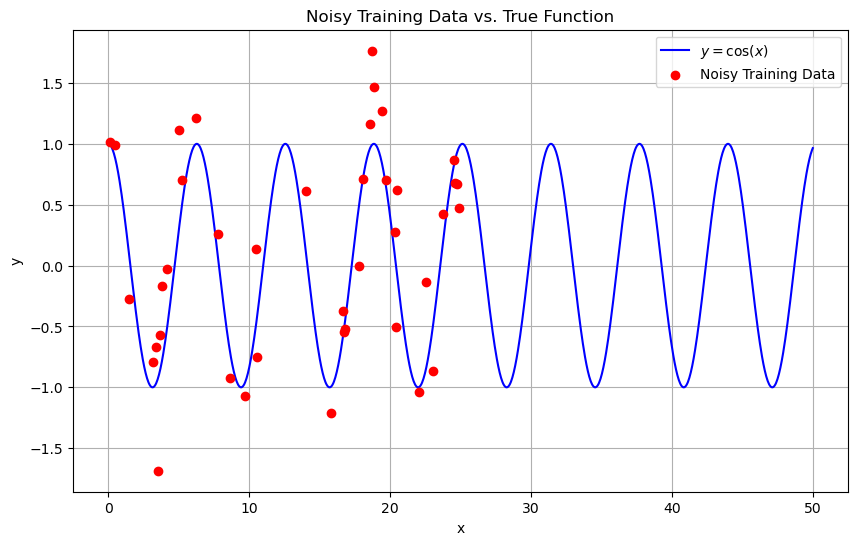

In [89]:
# Generate 1000 evenly spaced x data points
x = np.linspace(0, 50, 1000)

# True function y = cos(x)
y_true = np.cos(x)

# Generate the corresponding y data points using cos(x)
y = np.cos(x)

# Randomly select 40 points from the first 500 data points
np.random.seed(42)  # Ensure reproducibility
indices = np.random.choice(np.arange(500), size=40, replace=False)

# Add i.i.d. random noise (mean 0, variance 0.16) to the 40 selected points
noise = np.random.normal(0, np.sqrt(0.16), size=40)
x_train = x[indices]
y_train_noisy = y[indices] + noise

# Plot the results
plt.figure(figsize=(10, 6))

# Plot the true cos(x) function
plt.plot(x, y_true, label=r"$y = \cos(x)$", color='blue')

# Plot the noisy training data points
plt.scatter(x_train, y_train_noisy, label="Noisy Training Data", color='red', zorder=5)

# Set labels, title, and legend
plt.title("Noisy Training Data vs. True Function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

### Midterm 1 Project, Problem 2-2

In [90]:
# Part 1: Generate noisy data as done previously
# Generate 1000 evenly spaced x data points
x = np.linspace(0, 50, 1000)

# True function y = cos(x)
y_true = np.cos(x)

# Generate the corresponding y data points using cos(x)
y = np.cos(x)

# Randomly select 40 points from the first 500 data points
np.random.seed(42)  # Ensure reproducibility
indices = np.random.choice(np.arange(500), size=40, replace=False)

# Add i.i.d. random noise (mean 0, variance 0.16) to the 40 selected points
noise = np.random.normal(0, np.sqrt(0.16), size=40)
x_train = x[indices].reshape(-1, 1)
y_train_noisy = y[indices] + noise

# Part 2: Fit a Gaussian Process (GP) model using a periodic kernel and a white noise kernel
# Define the kernel: periodic kernel (ExpSineSquared) + white noise (WhiteKernel)
kernel = ExpSineSquared(length_scale=1.0, periodicity=1.0) + WhiteKernel(noise_level=1.0)

# Create the Gaussian Process Regressor with the specified kernel
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit the GP to the noisy data
gp.fit(x_train, y_train_noisy)

# Predict using the GP on the full x range
x_pred = x.reshape(-1, 1)
y_pred, y_std = gp.predict(x_pred, return_std=True)

# Extract the learned kernel hyperparameters
kernel_optimized = gp.kernel_
print("Optimized Kernel:", kernel_optimized)

# Extract the specific hyperparameters from the optimized kernel
# The amplitude (alpha) is implicitly part of the ExpSineSquared kernel, so we report its length scale and periodicity
p = kernel_optimized.k1.periodicity  # Periodicity (p)
ell = kernel_optimized.k1.length_scale  # Length scale (ℓ)
sigma = np.sqrt(kernel_optimized.k2.noise_level)  # Noise level (σ)

# Report the hyperparameters
print(f"Optimized hyperparameters:")
print(f"Periodicity (p): {p}")
print(f"Length Scale (ℓ): {ell}")
print(f"Noise Level (σ): {sigma}")

Optimized Kernel: ExpSineSquared(length_scale=1.84, periodicity=6.45) + WhiteKernel(noise_level=0.14)
Optimized hyperparameters:
Periodicity (p): 6.447335368768318
Length Scale (ℓ): 1.8431891941054277
Noise Level (σ): 0.37480938853048


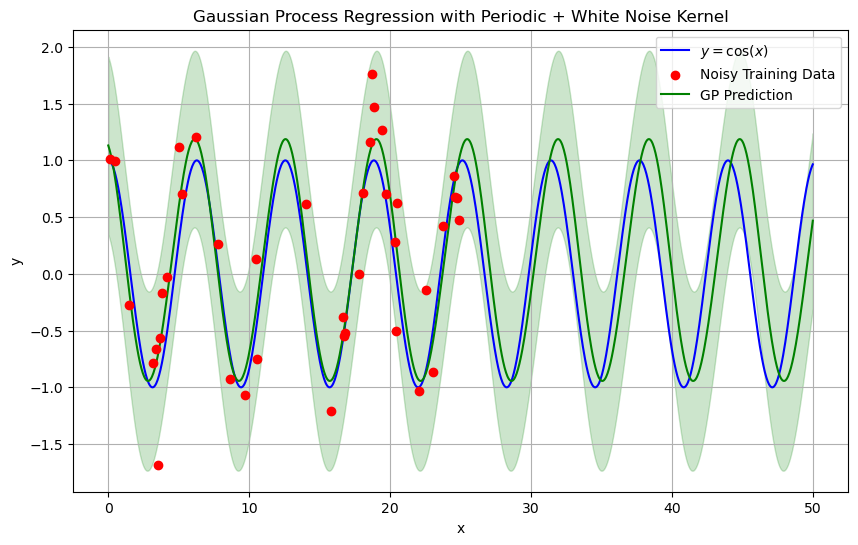

In [91]:
# Plot the results
plt.figure(figsize=(10, 6))

# Plot the true function y = cos(x)
plt.plot(x, y_true, label=r"$y = \cos(x)$", color='blue')

# Plot the noisy training data points
plt.scatter(x_train, y_train_noisy, label="Noisy Training Data", color='red', zorder=5)

# Plot the GP predictions with uncertainty bounds
plt.plot(x_pred, y_pred, label="GP Prediction", color='green')
plt.fill_between(x_pred.flatten(), y_pred - 1.96 * y_std, y_pred + 1.96 * y_std, alpha=0.2, color='green')

# Set labels, title, and legend
plt.title("Gaussian Process Regression with Periodic + White Noise Kernel")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

### Midterm 1 Project, Problem 2-3

In [92]:
# Part 1: Generate noisy data as done previously
# Generate 1000 evenly spaced x data points
x = np.linspace(0, 50, 1000)

# True function y = cos(x)
y_true = np.cos(x)

# Generate the corresponding y data points using cos(x)
y = np.cos(x)

# Randomly select 40 points from the first 500 data points
np.random.seed(42)  # Ensure reproducibility
indices = np.random.choice(np.arange(500), size=40, replace=False)

# Add i.i.d. random noise (mean 0, variance 0.16) to the 40 selected points
noise = np.random.normal(0, np.sqrt(0.16), size=40)
x_train = x[indices].reshape(-1, 1)
y_train_noisy = y[indices] + noise

# Part 2: Fit a Gaussian Process (GP) model using a periodic kernel and a white noise kernel
# Define the kernel: periodic kernel (ExpSineSquared) + white noise (WhiteKernel)
kernel = ExpSineSquared(length_scale=1.0, periodicity=1.0) + WhiteKernel(noise_level=1.0)

# Create the Gaussian Process Regressor with the specified kernel
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit the GP to the noisy data
gp.fit(x_train, y_train_noisy)

# Predict using the GP on the full x range
x_pred = x.reshape(-1, 1)
y_pred, y_std = gp.predict(x_pred, return_std=True)

# Extract the learned kernel hyperparameters
kernel_optimized = gp.kernel_
print("Optimized Kernel:", kernel_optimized)

# Extract the optimized noise level (sigma)
sigma = np.sqrt(kernel_optimized.k2.noise_level)
print(f"Original Noise Level (σ): {sigma}")

# Multiply the noise level by 2
new_sigma = 2 * sigma
print(f"New Noise Level (σ * 2): {new_sigma}")

# Update the kernel with the new noise level (σ * 2)
new_kernel = ExpSineSquared(length_scale=kernel_optimized.k1.length_scale,
                            periodicity=kernel_optimized.k1.periodicity) + WhiteKernel(noise_level=new_sigma**2)

# Re-fit the GP with the modified kernel
gp_new = GaussianProcessRegressor(kernel=new_kernel, n_restarts_optimizer=10)
gp_new.fit(x_train, y_train_noisy)

# Predict using the GP with modified noise level
y_pred_new, y_std_new = gp_new.predict(x_pred, return_std=True)

Optimized Kernel: ExpSineSquared(length_scale=1.84, periodicity=6.45) + WhiteKernel(noise_level=0.14)
Original Noise Level (σ): 0.37480938853048
New Noise Level (σ * 2): 0.74961877706096


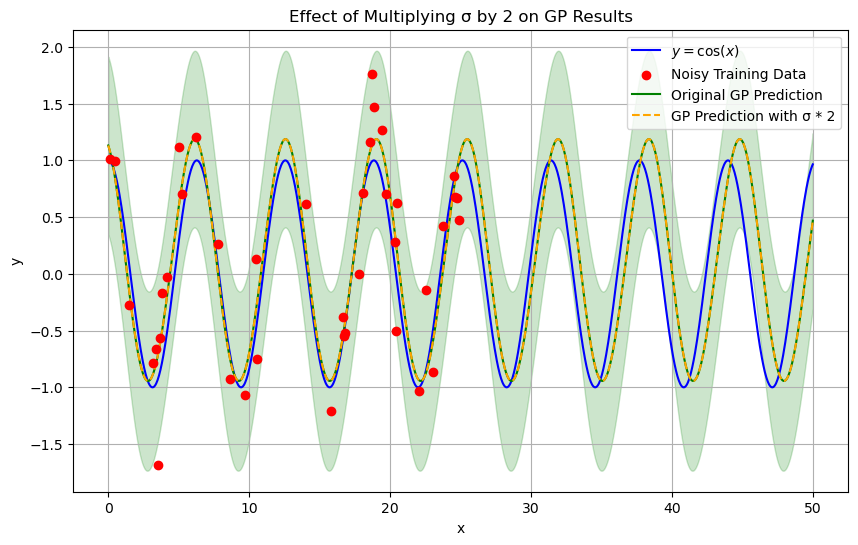

In [93]:
# Plot the results with the original GP and new GP after multiplying σ by 2
plt.figure(figsize=(10, 6))

# Plot the true function y = cos(x)
plt.plot(x, y_true, label=r"$y = \cos(x)$", color='blue')

# Plot the noisy training data points
plt.scatter(x_train, y_train_noisy, label="Noisy Training Data", color='red', zorder=5)

# Plot the original GP predictions with uncertainty bounds
plt.plot(x_pred, y_pred, label="Original GP Prediction", color='green')
plt.fill_between(x_pred.flatten(), y_pred - 1.96 * y_std, y_pred + 1.96 * y_std, alpha=0.2, color='green')

# Plot the new GP predictions with increased noise level
plt.plot(x_pred, y_pred_new, label="GP Prediction with σ * 2", color='orange', linestyle='--')
#plt.fill_between(x_pred.flatten(), y_pred_new - 1.96 * y_std_new, y_pred_new + 1.96 * y_std_new, alpha=0.2, color='orange')

# Set labels, title, and legend
plt.title("Effect of Multiplying σ by 2 on GP Results")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

### Midterm 1 Project, Problem 2-4

In [94]:
# Part 1: Generate noisy data as done previously
# Generate 1000 evenly spaced x data points
x = np.linspace(0, 50, 1000)

# True function y = cos(x)
y_true = np.cos(x)

# Generate the corresponding y data points using cos(x)
y = np.cos(x)

# Randomly select 40 points from the first 500 data points
np.random.seed(42)  # Ensure reproducibility
indices = np.random.choice(np.arange(500), size=40, replace=False)

# Add i.i.d. random noise (mean 0, variance 0.16) to the 40 selected points
noise = np.random.normal(0, np.sqrt(0.16), size=40)
x_train = x[indices].reshape(-1, 1)
y_train_noisy = y[indices] + noise

# Part 2: Fit a Gaussian Process (GP) model using a periodic kernel and a white noise kernel
# Define the kernel: periodic kernel (ExpSineSquared) + white noise (WhiteKernel)
kernel = ExpSineSquared(length_scale=1.0, periodicity=1.0) + WhiteKernel(noise_level=1.0)

# Create the Gaussian Process Regressor with the specified kernel
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit the GP to the noisy data
gp.fit(x_train, y_train_noisy)

# Predict using the GP on the full x range
x_pred = x.reshape(-1, 1)
y_pred, y_std = gp.predict(x_pred, return_std=True)

# Extract the learned kernel hyperparameters
kernel_optimized = gp.kernel_
print("Optimized Kernel:", kernel_optimized)

# Extract the optimized length scale (ℓ)
ell = kernel_optimized.k1.length_scale
print(f"Original Length Scale (ℓ): {ell}")

# Multiply the length scale by 2
new_ell = 2 * ell
print(f"New Length Scale (ℓ * 2): {new_ell}")

# Update the kernel with the new length scale (ℓ * 2)
new_kernel = ExpSineSquared(length_scale=new_ell,
                            periodicity=kernel_optimized.k1.periodicity) + WhiteKernel(noise_level=kernel_optimized.k2.noise_level)

# Re-fit the GP with the modified kernel
gp_new = GaussianProcessRegressor(kernel=new_kernel, n_restarts_optimizer=10)
gp_new.fit(x_train, y_train_noisy)

# Predict using the GP with modified length scale
y_pred_new, y_std_new = gp_new.predict(x_pred, return_std=True)

Optimized Kernel: ExpSineSquared(length_scale=1.84, periodicity=6.45) + WhiteKernel(noise_level=0.14)
Original Length Scale (ℓ): 1.8431891941054277
New Length Scale (ℓ * 2): 3.6863783882108554


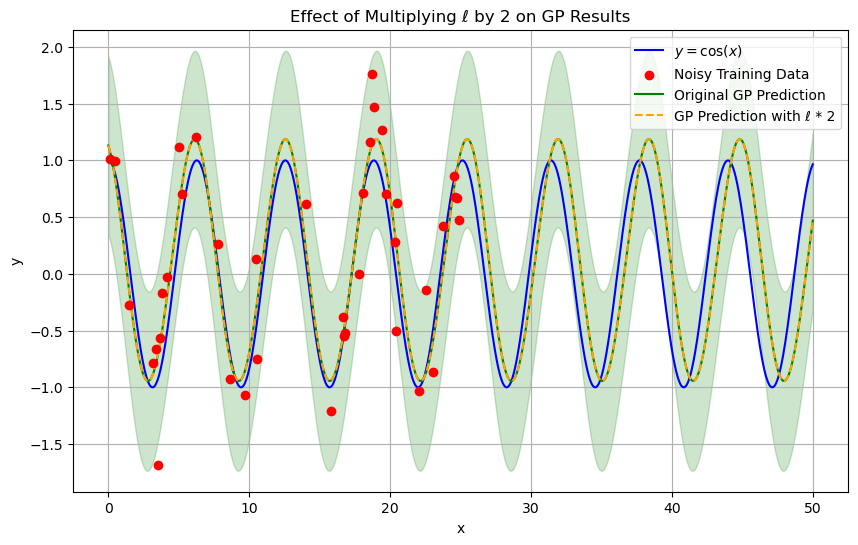

In [95]:
# Plot the results with the original GP and new GP after multiplying ℓ by 2
plt.figure(figsize=(10, 6))

# Plot the true function y = cos(x)
plt.plot(x, y_true, label=r"$y = \cos(x)$", color='blue')

# Plot the noisy training data points
plt.scatter(x_train, y_train_noisy, label="Noisy Training Data", color='red', zorder=5)

# Plot the original GP predictions with uncertainty bounds
plt.plot(x_pred, y_pred, label="Original GP Prediction", color='green')
plt.fill_between(x_pred.flatten(), y_pred - 1.96 * y_std, y_pred + 1.96 * y_std, alpha=0.2, color='green')

# Plot the new GP predictions with increased length scale
plt.plot(x_pred, y_pred_new, label="GP Prediction with ℓ * 2", color='orange', linestyle='--')
#plt.fill_between(x_pred.flatten(), y_pred_new - 1.96 * y_std_new, y_pred_new + 1.96 * y_std_new, alpha=0.2, color='orange')

# Set labels, title, and legend
plt.title("Effect of Multiplying ℓ by 2 on GP Results")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

### Midterm 1 Project, Problem 2-5

In [96]:
# Part 1: Generate noisy data as done previously
# Generate 1000 evenly spaced x data points
x = np.linspace(0, 50, 1000)

# True function y = cos(x)
y_true = np.cos(x)

# Generate the corresponding y data points using cos(x)
y = np.cos(x)

# Randomly select 40 points from the first 500 data points
np.random.seed(42)  # Ensure reproducibility
indices = np.random.choice(np.arange(500), size=40, replace=False)

# Add i.i.d. random noise (mean 0, variance 0.16) to the 40 selected points
noise = np.random.normal(0, np.sqrt(0.16), size=40)
x_train = x[indices].reshape(-1, 1)
y_train_noisy = y[indices] + noise

# Part 2: Fit a Gaussian Process (GP) model using a periodic kernel and a white noise kernel
# Define the kernel: periodic kernel (ExpSineSquared) + white noise (WhiteKernel)
kernel = ExpSineSquared(length_scale=1.0, periodicity=1.0) + WhiteKernel(noise_level=1.0)

# Create the Gaussian Process Regressor with the specified kernel
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit the GP to the noisy data
gp.fit(x_train, y_train_noisy)

# Predict using the GP on the full x range
x_pred = x.reshape(-1, 1)
y_pred_gp, y_std_gp = gp.predict(x_pred, return_std=True)

# Extract the learned kernel hyperparameters from the GP
kernel_optimized = gp.kernel_
print("Optimized Kernel from GP:", kernel_optimized)

# Extract the optimized periodic kernel hyperparameters (from GP model)
periodicity = kernel_optimized.k1.periodicity
length_scale = kernel_optimized.k1.length_scale

# Part 3: Kernel Ridge Regression (KRR)
# Use the same periodic kernel hyperparameters as in the GP model
krr_kernel = ExpSineSquared(length_scale=length_scale, periodicity=periodicity)

# Choose the penalty coefficient (regularization parameter)
# Use a value similar to the noise variance in GP model to match the GP's posterior mean
penalty_coefficient = kernel_optimized.k2.noise_level
print(f"Penalty Coefficient for KRR (λ): {penalty_coefficient}")

# Fit the KRR model
krr = KernelRidge(kernel=krr_kernel, alpha=penalty_coefficient)
krr.fit(x_train, y_train_noisy)

# Predict using the KRR model
y_pred_krr = krr.predict(x_pred)

Optimized Kernel from GP: ExpSineSquared(length_scale=1.84, periodicity=6.45) + WhiteKernel(noise_level=0.14)
Penalty Coefficient for KRR (λ): 0.14048207773059232


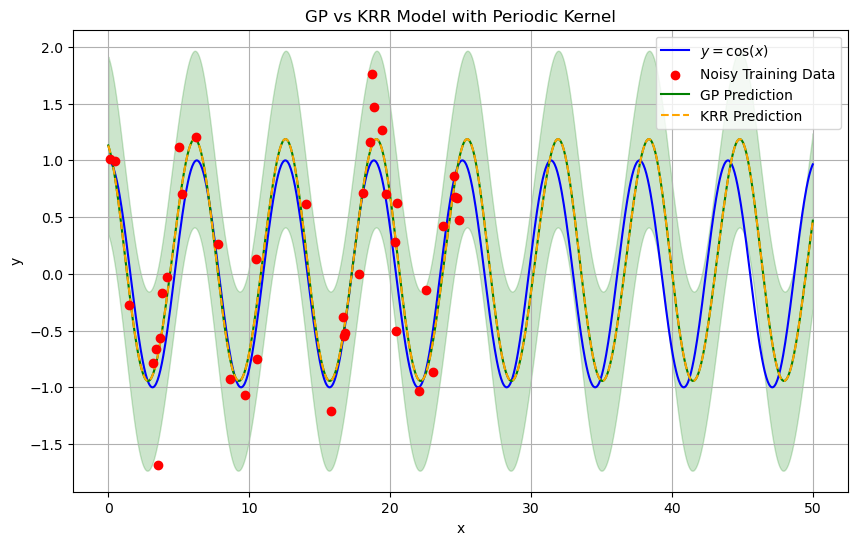

In [97]:
# Plot the results with the GP and KRR
plt.figure(figsize=(10, 6))

# Plot the true function y = cos(x)
plt.plot(x, y_true, label=r"$y = \cos(x)$", color='blue')

# Plot the noisy training data points
plt.scatter(x_train, y_train_noisy, label="Noisy Training Data", color='red', zorder=5)

# Plot the GP predictions with uncertainty bounds
plt.plot(x_pred, y_pred_gp, label="GP Prediction", color='green')
plt.fill_between(x_pred.flatten(), y_pred_gp - 1.96 * y_std_gp, y_pred_gp + 1.96 * y_std_gp, alpha=0.2, color='green')

# Plot the KRR predictions
plt.plot(x_pred, y_pred_krr, label="KRR Prediction", color='orange', linestyle='--')

# Set labels, title, and legend
plt.title("GP vs KRR Model with Periodic Kernel")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

### Midterm 1 Project, Problem 2-6

In [101]:
# Part 1: Generate noisy data as done previously
# Generate 1000 evenly spaced x data points
x = np.linspace(0, 50, 1000)

# True function y = cos(x)
y_true = np.cos(x)

# Generate the corresponding y data points using cos(x)
y = np.cos(x)

# Randomly select 40 points from the first 500 data points
np.random.seed(42)  # Ensure reproducibility
indices = np.random.choice(np.arange(500), size=40, replace=False)

# Add i.i.d. random noise (mean 0, variance 0.16) to the 40 selected points
noise = np.random.normal(0, np.sqrt(0.16), size=40)
x_train = x[indices].reshape(-1, 1)
y_train_noisy = y[indices] + noise

# Part 2: Fit a Gaussian Process (GP) model using a periodic kernel
# Define the kernel: periodic kernel (ExpSineSquared) + white noise (WhiteKernel)
kernel_gp = ExpSineSquared(length_scale=1.0, periodicity=1.0) + WhiteKernel(noise_level=1.0)

# Create the Gaussian Process Regressor with the specified kernel
gp = GaussianProcessRegressor(kernel=kernel_gp, n_restarts_optimizer=10)

# Fit the GP to the noisy data
gp.fit(x_train, y_train_noisy)

# Predict using the GP on the full x range
x_pred = x.reshape(-1, 1)
y_pred_gp, y_std_gp = gp.predict(x_pred, return_std=True)

# Part 3: Use the same periodic kernel for KRR and set λ to 10
krr_kernel = ExpSineSquared(length_scale=1.0, periodicity=1.0)

# Set penalty coefficient λ to 10
penalty_coefficient = 10
print(f"Penalty Coefficient for KRR (λ): {penalty_coefficient}")

# Fit the KRR model with λ = 10
krr = KernelRidge(kernel=krr_kernel, alpha=penalty_coefficient)
krr.fit(x_train, y_train_noisy)

# Predict using the KRR model
y_pred_krr = krr.predict(x_pred)


Penalty Coefficient for KRR (λ): 10


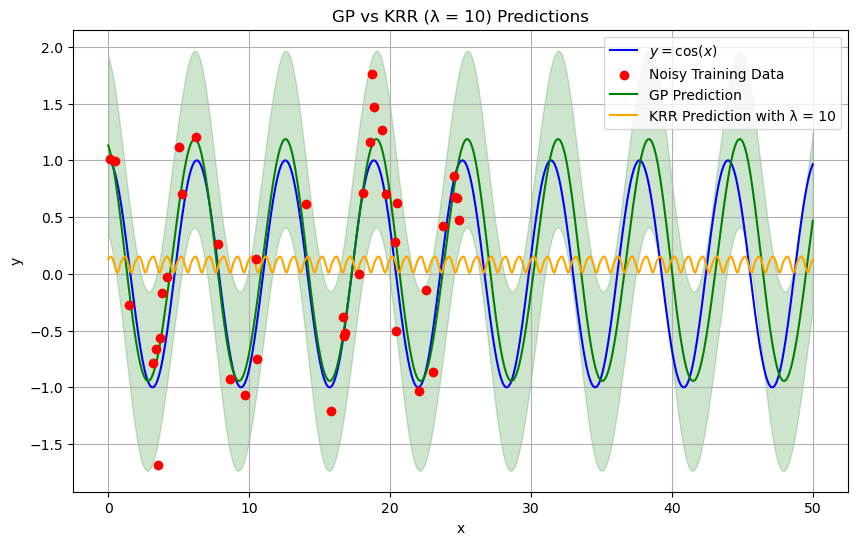

In [102]:
# Plot the results with GP, KRR λ = 10, and the true function
plt.figure(figsize=(10, 6))

# Plot the true function y = cos(x)
plt.plot(x, y_true, label=r"$y = \cos(x)$", color='blue')

# Plot the noisy training data points
plt.scatter(x_train, y_train_noisy, label="Noisy Training Data", color='red', zorder=5)

# Plot the GP predictions with uncertainty bounds
plt.plot(x_pred, y_pred_gp, label="GP Prediction", color='green')
plt.fill_between(x_pred.flatten(), y_pred_gp - 1.96 * y_std_gp, y_pred_gp + 1.96 * y_std_gp, alpha=0.2, color='green')

# Plot the KRR predictions with λ = 10
plt.plot(x_pred, y_pred_krr, label="KRR Prediction with λ = 10", color='orange')

# Set labels, title, and legend
plt.title("GP vs KRR (λ = 10) Predictions")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()